# Solution: k-Nearest Neighbors

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Read in the Social Networks Ads dataset __`data/Social_Network_Ads.csv`__

In [23]:
# Read in the dataset
data = pd.read_csv('data/Social_Network_Ads.csv')

### Examine the dataset

In [24]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Drop any irrelevant columns

In [26]:
# User ID is irrelvant and could be leakage data, so drop it
data.drop(columns=['User ID'], inplace=True)

### Deal with categorical variables

In [28]:
# Convert categorical variables to numeric
data = pd.get_dummies(data, drop_first=True)

In [29]:
data.describe()

,Age,EstimatedSalary,Purchased,Gender_Male
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.490000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


### The target is whether the person purchased the item or not

In [30]:
# Drop the target we are trying to predict
X = data.drop(columns=['Purchased'])
y = data['Purchased']

### Split your data into training and test sets

In [31]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

### Use the default KNeighborsClassifier

In [32]:
# Train the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Generate a confusion matrix to see how your model performed

In [33]:
# Make predictions
y_pred = knn.predict(X_test)

In [34]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[56, 11],
       [14, 19]])

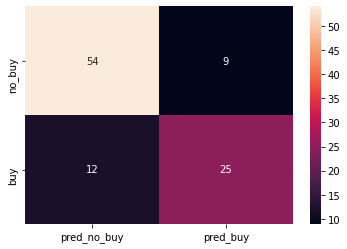

In [12]:
import seaborn as sns
sns.heatmap(cm, annot=True, xticklabels='pred_no_buy pred_buy'.split(), yticklabels='no_buy buy'.split());

In [35]:
X_train.describe()

,Age,EstimatedSalary,Gender_Male
count,300.000000,300.000000,300.000000
mean,37.643333,70573.333333,0.493333
std,10.414942,35183.484014,0.500791
min,18.000000,15000.000000,0.000000
25%,30.000000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### kNN will not perform well when the inputs are not properly scaled
  * the scale of the values of Age, EstimatedSalary, and Gender are wildly different
  * use a __StandardScaler()__ from __`sklearn.preprocessing`__ to scale your X values as follows and try again
  * __`sc = StandardScaler()`__
  * __`X_train = sc.fit_transform(X_train)`__
  * __`X_test = sc.transform(X_test)`__
1. Did your model perform better after scaling?
1. If you have time, try different values of k

In [36]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [43]:
X_train_scaled.min(axis=0), X_train_scaled.max(axis=0)

(array([-1.88922353, -1.58216815, -0.98675438]),
 array([2.15018195, 2.26127055, 1.01342342]))

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
cm_scaled = confusion_matrix(y_test, y_pred)
cm_scaled

array([[60,  7],
       [ 4, 29]])

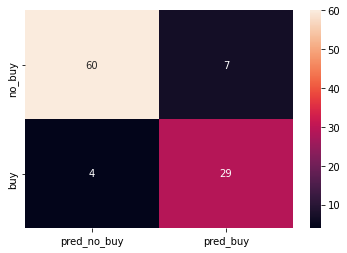

In [38]:
sns.heatmap(cm_scaled, annot=True, xticklabels='pred_no_buy pred_buy'.split(), yticklabels='no_buy buy'.split());